<a href="https://colab.research.google.com/github/hungpham13/Distributed-data-discretization/blob/main/Data-preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !git clone https://github.com/hungpham13/Distributed-data-discretization
# %cd Distributed-data-discretization/
# !pip install -r requirements.txt

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

Generating exponential distribution, 36 days, 1000 samples...


100%|██████████| 35/35 [00:02<00:00, 14.58it/s]


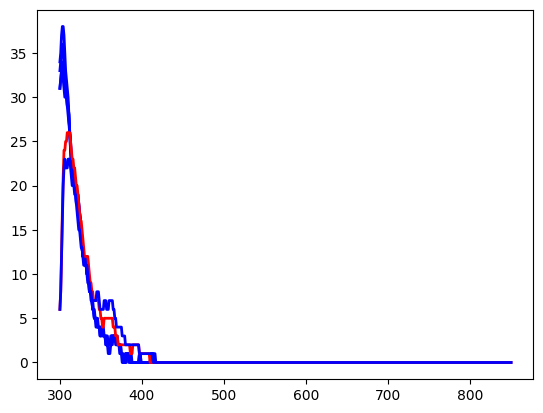

[[22 46 33 ...  0  0  0]
 [22 44 35 ...  0  0  0]
 [23 41 30 ...  0  0  0]
 [23 37 34 ...  0  0  0]
 [ 2  4  2 ...  0  0  1]]


In [1]:
from data.gen_data import generate_data
data = generate_data(36, 1000, 'exponential', visualize=True)
# nums_sam = [1000, 3000, 10000, 30000, 100000, 300000, 1000000]
# nums_day = [30, 60, 120, 365, 365*2, 365*3]
# dists = ['exponential']

# for dist in dists:
#     for num_samples in nums_sam:
#         for num_days in nums_day:
#             data = generate_data(num_days, num_samples, dist, visualize=False)

In [ ]:
import numpy as np
data[0, :-1]
print(np.max(data[:,:-1]), np.max(data[:,:-1]) <= 850)
print(np.min(data[:, :-1]), np.min(data[:, :-1]) >=300)

807 True
300 True


In [ ]:
from model.psi import get_breakpoint 
from model.psi import calculate_psi

breakpoints = get_breakpoint(data[:,:-1].reshape(-1), buckettype='bins', buckets=10)
print(breakpoints)
for i in range(len(data) - 1):
    psi = calculate_psi(expected=data[i, :-1], actual=data[i + 1, :-1],
                        breakpoints=breakpoints)
    if (data[i + 1, -1] == 0 and psi > 0.1):
        print(psi)

[300.  350.7 401.4 452.1 502.8 553.5 604.2 654.9 705.6 756.3 807. ]
0.18654924403693762
0.10927285954250823
0.19647613023360028
0.2744817154300866
0.11410041298296691
0.10137260968927361
0.13819511887695884
0.214094921676866
0.15295986587171304
0.20521311765305913


In [15]:
import numpy as np
x = [1,2,2,1,3,4,5]
hist, _ = np.histogram(x, bins=np.arange(1, 7, 1))
hist.tolist()

[2, 2, 1, 1, 1]

<AxesSubplot: >

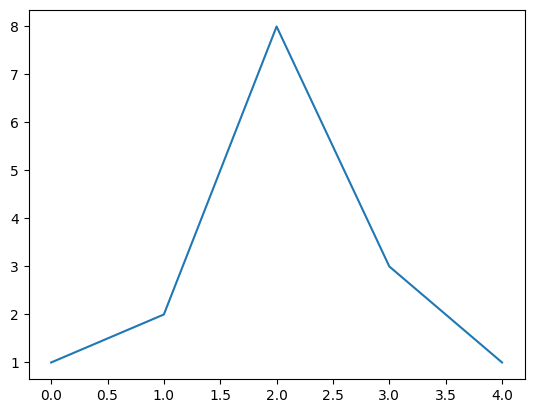

In [17]:
import seaborn as sns
sns.lineplot([1,2,8,3,1])